In [59]:
import numpy as np 
import astropy.constants as const
import matplotlib.pyplot as plt
from scipy import interpolate


In [23]:
T_star = 4350 #K
M_star = 1*const.M_sun.value    #M_sol
R_star = 1.7*const.R_sun.value  #R_sol
sigma = 3300*(0.001/10e-3)  #g/cm^2

In [3]:
def omega_k(r):
    return (const.G.value*M_star/r**3)**(1/2) #proveri jedinie

In [4]:
def c_s():
    return (const.k_B.value*T_star/2.3/const.m_p.value)**(1/2) ###PROMENI JEDINICE(ako treba)

In [5]:
def nu(r):
    alpha = 10e-3
    return alpha * c_s()**2/omega_k(r)

In [6]:
def M_dot(r):
    return 3*np.pi*sigma*nu(r)

In [7]:
def T_eff_acc(r):
    return (3/8/np.pi*const.G.value*M_star*M_dot(r)/r**3*(1-np.sqrt(R_star/r)))**(1/4)

In [8]:
def T_mid_acc(r):
    tau_r = r**(-33/14)
    return (3/4*(tau_r+2/3)*T_eff_acc(r)**4)**(1/4)

In [9]:
def T_irr(r):
    alpha = 0.4*R_star/r
    return ((alpha/2)*R_star**2/r**2*T_star**4)**(1/4)
    

In [10]:
def T_mid(r):
    return (T_mid_acc(r)**4 + T_irr(r)**4)**(1/4)

In [30]:
r_niz = np.linspace(0.05, 10, 100)*const.au.value

In [31]:
T_niz = [T_mid(x) for x in r_niz]

In [29]:
T_niz

[729.421209571165,
 69.20106657632138,
 41.82775147418344,
 31.031724086444363,
 25.079190788626825,
 21.250062368668683,
 18.55501646511648,
 16.54244241649504,
 14.97501361372915,
 13.715335463120647]

In [61]:
f = interpolate.interp1d(T_niz, r_niz)

In [66]:
snowline = f(170)/const.au.value

(0.2, 0.6)

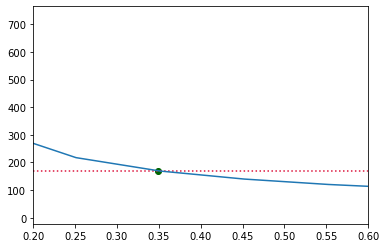

In [70]:
plt.plot(r_niz/const.au.value, T_niz)
plt.hlines(170, 0, 10, color='crimson', linestyle = 'dotted')
plt.scatter(snowline, 170, marker = 'o', color='darkgreen')
plt.xlim(0.2, 0.6)